# Supermarket Sales Report

This an explatory analysis using Seaborn for a supermarket which has 3 branches in different cities. It's about 1000 row & 17 columns representing data for gender, product line, payment method, total sales & gross income.

Through our analysis will will investigate the relationship between the data labels as below:

> 1- Which is the most sales of the product's line & does  it differeniate depending on gender ?
>
> 2- Does sale's revenue by females is more than males & they are members or normal buyers?
>
> 3- Which is the city with the most sales records?
>
> 4- Does most of people use credit card to pay?
>
> 5- As this report analysis the period between 10AM till 9PM, which is the most sale's income hour?
>
> 6- What is the average of rating?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing the libraries we gonna use

In [2]:
df = pd.read_csv('supermarket_sales.csv')

Read the CSV file

# Data Wrangling
Overview the dataset & see some statistics

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


See data's header & some lines of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Check data types & if there is any null data & there is no any null data & all types are correct 

In [5]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


Check some statistics about the dataset as we can see there is no zero values 

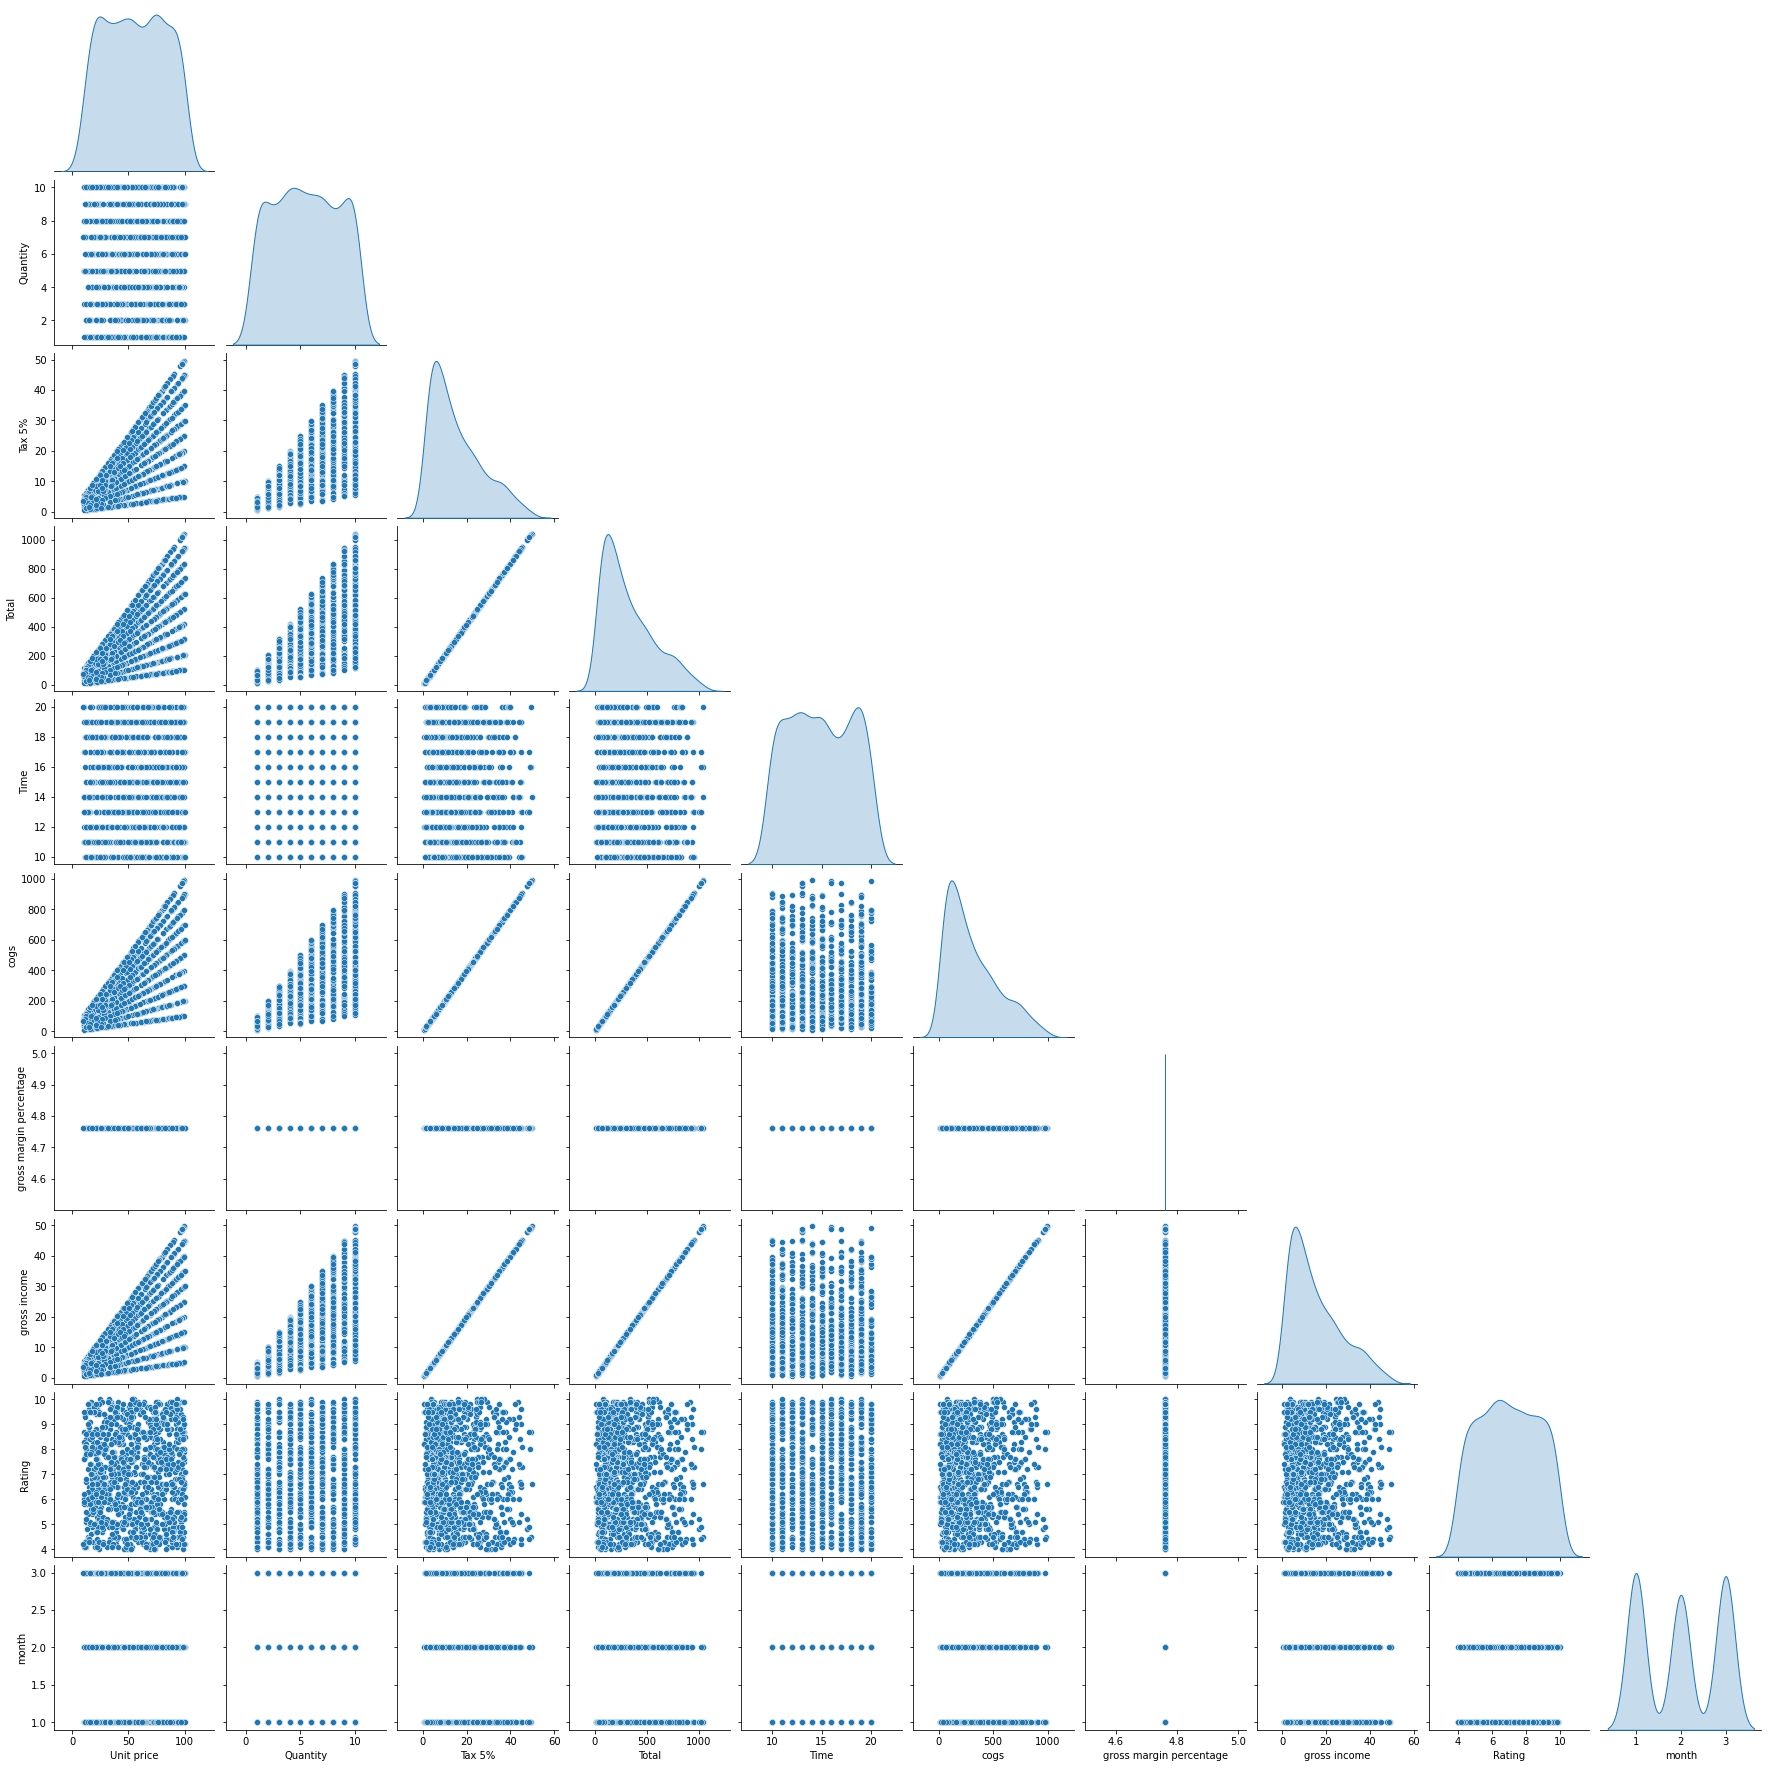

In [26]:
sns.pairplot(df, diag_kind="kde", corner=True, palette='mako')

Check the relation between the dataset labels

As per our data wrangling, we could easily found that this dataset is unique; no duplicates, no null data & no zero values, so we gonna visualize our analysis to highlight the result

# Data Visualization
Here we go to visualize our analysis via seaborn plots

 #  Q1- Which is the most sales of the product's line & does  it differeniate depending on gender ?


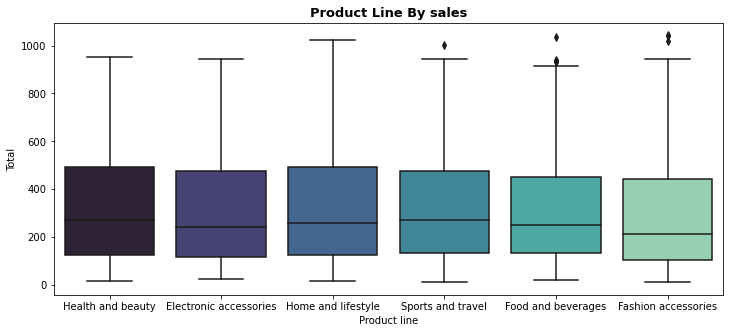

In [8]:
sns.boxplot(data =df, x='Product line', y='Total', palette="mako")
plt.title('Product Line By sales', fontsize=13, fontdict={'weight':'bold'})
plt.gcf().set_size_inches(12,5)
plt.show()

As we could see, Home & lifestyle line is the most sales records over the 3 months

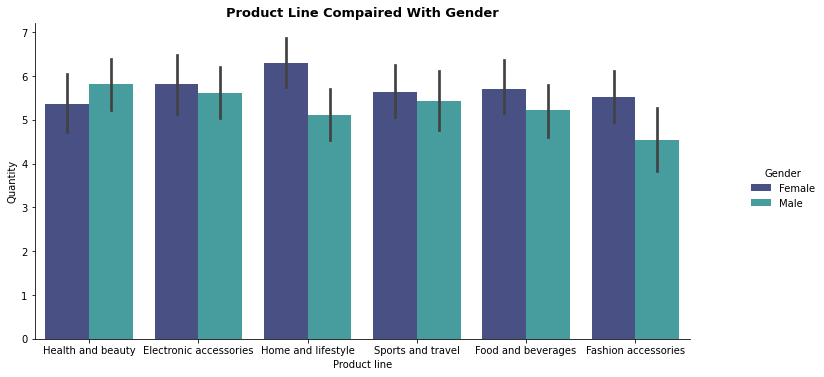

In [9]:
sns.catplot(data=df, kind='bar', x='Product line', y='Quantity', hue='Gender', palette="mako", height=6)
plt.gcf().set_size_inches(12,5)
plt.title('Product Line Compaired With Gender', fontsize=13, fontdict={'weight':'bold'})
plt.show()

We could easily get that female are the most buyer for all product line except Health & Beauty


# Q2- Does sale's revenue by females is more than males & they are members or normal buyers?


In [11]:
f = df.query('Gender == "Female"').Total.sum()
m = df.query('Gender == "Male"').Total.sum()

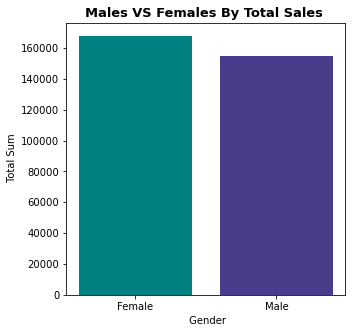

In [25]:
plt.bar([1,2], [f, m], tick_label=['Female', 'Male'], color=['teal', 'darkslateblue'])
plt.gcf().set_size_inches(5,5)
plt.title('Males VS Females By Total Sales ', fontsize=13, fontdict={'weight':'bold'})
plt.xlabel(' Gender')
plt.ylabel(' Total Sum')
plt.show()

Sales revenue by female is greater than male over the 3 months

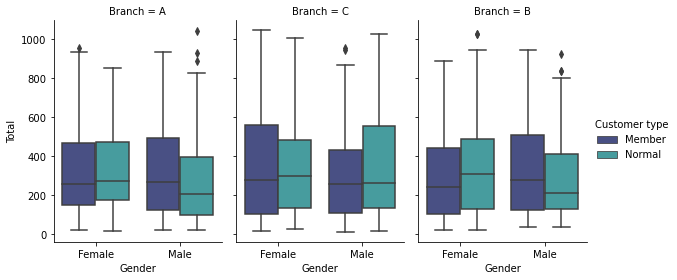

In [13]:
sns.catplot(x="Gender", y="Total", hue="Customer type", col="Branch", data=df, kind="box", palette="mako", height=4, aspect=.7)
plt.show()

Here is the distibution of the membership status by gender over the 3 branches:
    
    1- In branch A, all male & female are member in common
    2- Instead in branch C normal male buyers are greather than memebr ones
    3- Branch B has female normal buyers more than female members


#  Q3- Which is the city with the most sales records?


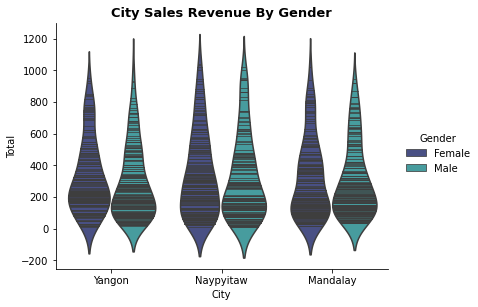

In [14]:
sns.catplot(data = df, x='City', y='Total', hue='Gender', dodge=True, palette="mako", inner='stick', kind='violin')
plt.gcf().set_size_inches(7,4)
plt.title('City Sales Revenue By Gender', fontsize=13, fontdict={'weight':'bold'})
plt.show()

Naypyitaw City is the most sales revenue with equal score of male & female buyers

In [16]:
df['month']= pd.to_datetime(df['Date']).dt.month
month_city_revenue = df.groupby(['month', 'City'])['Total'].count().reset_index()
month_city_revenue_pivot= month_city_revenue.pivot(index='month', columns='City', values='Total').fillna(0)

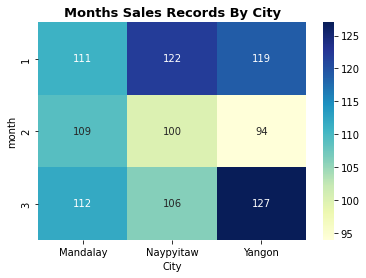

In [18]:
sns.heatmap(month_city_revenue_pivot, annot=True, fmt='.0f', cmap="YlGnBu")
plt.title('Months Sales Records By City', fontsize=13, fontdict={'weight':'bold'})
plt.show()

As we could see, this about the sales revenue of the 3 cities over the 3 months with exact numbers


# Q4- Does most of people use credit card to pay?


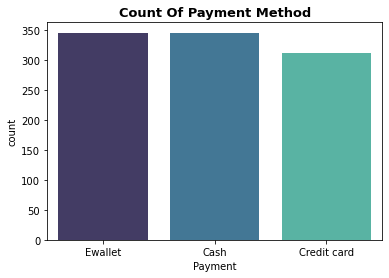

In [19]:
sns.countplot(data = df, x='Payment', palette="mako")
plt.title('Count Of Payment Method', fontsize=13, fontdict={'weight':'bold'})
plt.show()

Credit card is used less than Ewallet & cash payment

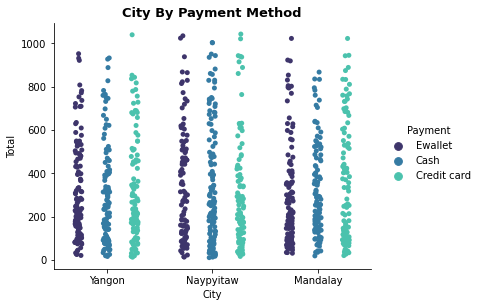

In [20]:
sns.catplot(data=df, x='City', y='Total', hue='Payment', palette="mako", dodge=True, kind='strip')
plt.gcf().set_size_inches(7,4)
plt.title('City By Payment Method', fontsize=13, fontdict={'weight':'bold'})
plt.show()

This is a visual for payment usage compared with the 3 cities

# Q5- As this report analysis the period between 10AM till 8PM, which is the most sales revenue hour?

In [21]:
df['Time'] = pd.to_datetime(df['Time']).dt.hour

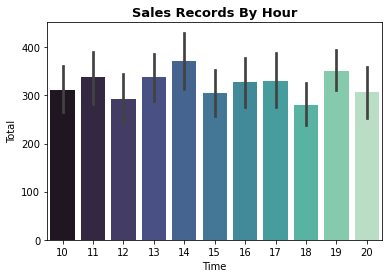

In [22]:
sns.barplot(data =df, x='Time', y='Total', palette="mako")
plt.title('Sales Records By Hour', fontsize=13, fontdict={'weight':'bold'})
plt.show()

Sales revenue at 2PM & 7PM is the highest over the cities & months


# Q6- What is the average of rating?

In [23]:
rating =df.groupby('City').Rating.mean()

Text(0.5, 1.0, 'Average Of Rating')

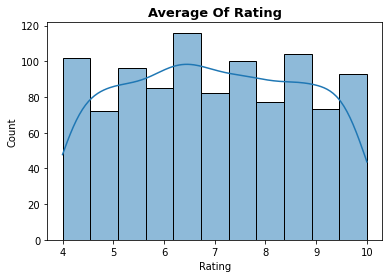

In [24]:
sns.histplot(data=df, x='Rating', palette="mako",kde=True )
plt.title('Average Of Rating', fontsize=13, fontdict={'weight':'bold'})

As per this data distribution the average of rating is between 6 & 7

# Conclusion

   >1- January is the most sales revnue month 
   >
   >2- Health & Beauty is the most sales revenue product line
   >
   >3- Naypyitaw City is the most sales revenue city
   >
   >4- 2PM got the most sales records
   >
   >5- Most of buyers uses Ewallet & cash 
   >
   >6- Female & male buyers are nearly the same percentage
